<a href="https://colab.research.google.com/github/jobsiggang/2026_AI_Datascience/blob/main/2026_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EA%B8%B0%EC%83%81%ED%8F%AC%ED%84%B8%EC%9A%B8%EB%A6%89%EB%8F%84%ED%92%8D%EC%86%8D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 울릉도의 바람세기 분석하기

In [ ]:
!pip install koreanize-matplotlib -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 65.7 MB/s eta 0:00:00


In [ ]:
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 판다스를 통해서 countries 데이터 읽기
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
df_wind.head()

,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2015-01-01,4.9,11.6,340.0,12:35,22.3,340.0,12:33
115,울릉도,2015-01-02,4.0,12.1,50.0,17:01,18.4,50.0,16:30
115,울릉도,2015-01-03,3.3,5.6,250.0,23:02,8.8,230.0,19:01
115,울릉도,2015-01-04,2.4,5.6,250.0,00:48,9.3,270.0,04:06
115,울릉도,2015-01-05,3.4,9.4,200.0,21:00,15.2,250.0,22:54


In [ ]:
# df_weather의 수치형 데이터에 대한 기본 통계 정보를 요약하여 출력
# 각 열에 대해 count(개수), mean(평균), std(표준편차), min(최소값),
# 25%, 50%, 75% 백분위 수, max(최대값)를 계산하여 보여줌
df_wind.describe()

,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대순간풍속(m/s),최대순간풍속풍향(deg)
count,4012.000000,4014.000000,4015.000000,4014.000000,4015.000000
mean,3.887886,7.830294,168.291407,13.209691,172.046824
std,1.837278,3.012720,104.402682,5.095699,103.878212
min,0.700000,1.900000,20.000000,3.500000,16.000000
25%,2.500000,5.500000,50.000000,9.300000,50.000000
50%,3.500000,7.550000,230.000000,12.800000,200.000000
75%,4.900000,9.700000,250.000000,16.700000,250.000000
max,14.900000,26.000000,360.000000,43.400000,360.000000


In [ ]:
# df_weather DataFrame의 전체 구조 정보를 출력
# 각 열의 이름, 데이터 타입(dtype), 값이 비어있지 않은(non-null) 값의 개수,
# 전체 메모리 사용량 등을 요약하여 보여줌
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4016 entries, 115 to 115
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점명            4016 non-null   object 
 1   일시             4016 non-null   object 
 2   평균풍속(m/s)      4012 non-null   float64
 3   최대풍속(m/s)      4014 non-null   float64
 4   최대풍속풍향(deg)    4015 non-null   float64
 5   	최대풍속시각        4015 non-null   object 
 6   최대순간풍속(m/s)    4014 non-null   float64
 7   최대순간풍속풍향(deg)  4015 non-null   float64
 8   	최대순간풍속시각      4015 non-null   object 
dtypes: float64(5), object(4)
memory usage: 313.8+ KB


In [ ]:
df_wind['일시']=pd.to_datetime(df_weather['일시'])
df_wind.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4016 entries, 115 to 115
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   지점명            4016 non-null   object        
 1   일시             4016 non-null   datetime64[ns]
 2   평균풍속(m/s)      4012 non-null   float64       
 3   최대풍속(m/s)      4014 non-null   float64       
 4   최대풍속풍향(deg)    4015 non-null   float64       
 5   	최대풍속시각        4015 non-null   object        
 6   최대순간풍속(m/s)    4014 non-null   float64       
 7   최대순간풍속풍향(deg)  4015 non-null   float64       
 8   	최대순간풍속시각      4015 non-null   object        
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 313.8+ KB


In [ ]:
df_wind.columns

Index(['지점명', '일시', '평균풍속(m/s)', '최대풍속(m/s)', '최대풍속풍향(deg)', '\t최대풍속시각',
       '최대순간풍속(m/s)', '최대순간풍속풍향(deg)', '\t최대순간풍속시각'],
      dtype='object')

In [ ]:
# df_weather의 수치형 열들 간의 상관관계(correlation)를 계산
# 상관계수는 -1에서 1 사이의 값을 가지며, 1에 가까울수록 양의 상관관계,
# -1에 가까울수록 음의 상관관계를 나타냄. 0에 가까우면 상관관계가 거의 없음.
df_wind[['일시', '평균풍속(m/s)', '최대풍속(m/s)', '최대풍속풍향(deg)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)']].corr()

,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대순간풍속(m/s),최대순간풍속풍향(deg)
일시,1.000000,0.007649,-0.018451,0.040429,0.048559,-0.001700
평균풍속(m/s),0.007649,1.000000,0.836923,-0.048608,0.776070,-0.047858
최대풍속(m/s),-0.018451,0.836923,1.000000,0.004593,0.941900,0.003931
최대풍속풍향(deg),0.040429,-0.048608,0.004593,1.000000,0.086652,0.684815
최대순간풍속(m/s),0.048559,0.776070,0.941900,0.086652,1.000000,0.069110
최대순간풍속풍향(deg),-0.001700,-0.047858,0.003931,0.684815,0.069110,1.000000


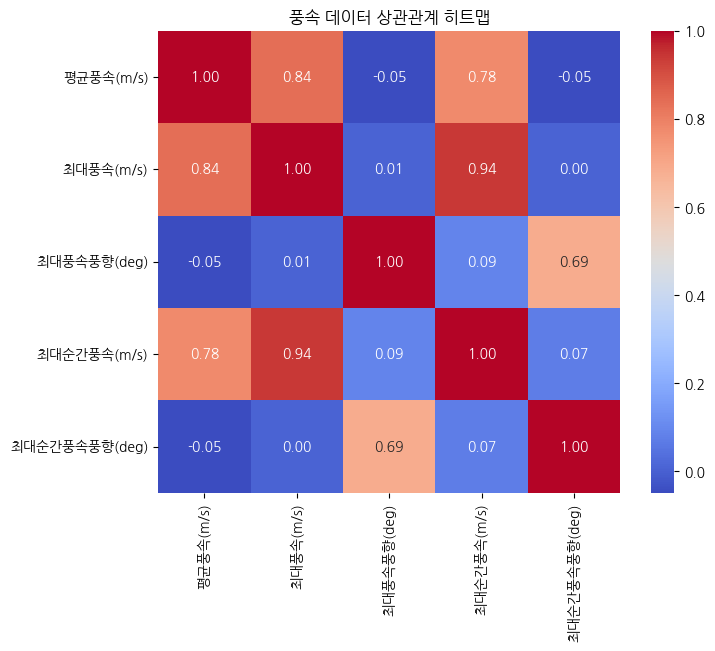

In [ ]:
numeric_cols = ['평균풍속(m/s)', '최대풍속(m/s)', '최대풍속풍향(deg)', '최대순간풍속(m/s)', '최대순간풍속풍향(deg)']
correlation_matrix = df_wind[numeric_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('풍속 데이터 상관관계 히트맵')
plt.show()

# 평균풍속과 최대순간풍속이 가장 큰 달이 동일한가?




#1. 데이터 그룹핑

In [ ]:
# '일시' 열에서 날짜 정보를 Datetime 형식으로 변환하고, 월(month) 정보 추출하여 'month' 열에 저장
df_wind['월'] = pd.DatetimeIndex(df_wind['일시']).month

# 데이터의 첫 5행을 출력하여 확인
df_wind.head()

,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각,월
지점번호,,,,,,,,,,
115,울릉도,2015-01-01,4.9,11.6,340.0,12:35,22.3,340.0,12:33,1
115,울릉도,2015-01-02,4.0,12.1,50.0,17:01,18.4,50.0,16:30,1
115,울릉도,2015-01-03,3.3,5.6,250.0,23:02,8.8,230.0,19:01,1
115,울릉도,2015-01-04,2.4,5.6,250.0,00:48,9.3,270.0,04:06,1
115,울릉도,2015-01-05,3.4,9.4,200.0,21:00,15.2,250.0,22:54,1


In [ ]:
# '월' 열을 기준으로 weather DataFrame을 그룹화하고,
# 각 월에 대해 수치형(numeric_only=True) 열들의 평균값을 계산하여 means DataFrame에 저장
df_means = df_wind.groupby('월').mean(numeric_only=True)
df_means.describe()

,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),최대순간풍속(m/s),최대순간풍속풍향(deg)
count,12.000000,12.000000,12.000000,12.000000,12.000000
mean,3.889076,7.834514,168.325881,13.210379,172.034617
std,0.308846,0.756708,22.742391,1.482348,19.327959
min,3.469208,6.670968,124.818182,10.973021,136.787879
25%,3.686163,7.158485,163.665689,11.534167,167.859238
50%,3.804980,7.909899,169.266862,13.954042,171.975073
75%,4.031049,8.406842,178.954545,14.435638,177.156387
max,4.509624,9.027052,206.568047,14.747273,208.727811


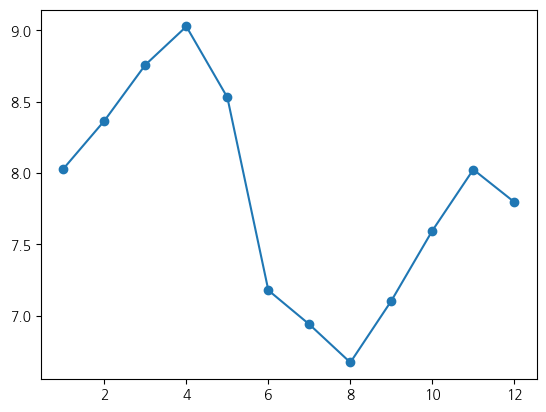

In [ ]:
# 월(month) 정보를 인덱스로 가지고 있는 df_means DataFrame에서 최대 풍속(m/s)의 월별 데이터를 시각화
# df_means.index는 월 정보, df_means['최대풍속(m/s)']는 해당 월의 최대 풍속 데이터
plt.plot(df_means.index, df_means['최대풍속(m/s)'], marker='o')

# 그래프를 화면에 표시
plt.show()


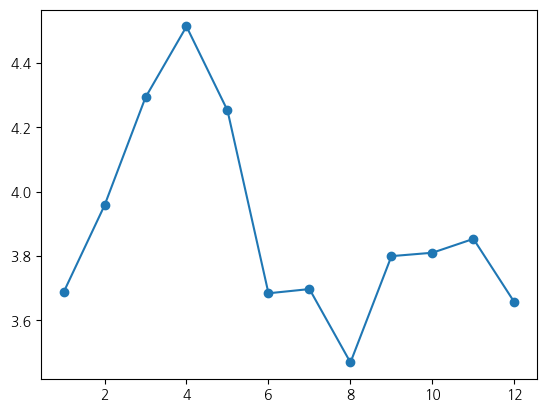

In [ ]:
# 월 정보를 인덱스로 가지고 있는 df_means DataFrame에서 평균풍속(m/s)의 월별 데이터를 시각화
# df_means.index는 월 정보, df_means['평균풍속(m/s)']는 해당 월의 최대 풍속 데이터
plt.plot(df_means.index, df_means['평균풍속(m/s)'], marker='o')

# 그래프를 화면에 표시
plt.show()


# 2. 결손값 찾아 삭제하기

In [ ]:
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
missing_data = df_wind [ df_wind['평균풍속(m/s)'].isna() ]
missing_data

,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2015-03-22,NaN,11.6,340.0,06:38,19.1,340.0,06:29
115,울릉도,2015-04-01,NaN,12.1,50.0,10:27,20.9,70.0,10:22
115,울릉도,2019-04-18,NaN,11.7,230.0,22:50,16.5,200.0,12:18
115,울릉도,2025-12-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측값(NaN)이 포함된 행을 모두 삭제
# axis=0은 행(row) 단위로 동작함을 의미하며,
# how="any"는 하나라도 결측값이 있는 행을 삭제하는 설정
# inplace=True는 원본 DataFrame에서 바로 수정이 이루어지도록 함
df_wind.dropna(axis=0, how="any", inplace=True)

df_wind[ df_wind['일시'] =='2019-04-18']


,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,


# 3. 결손값 보정하기

In [ ]:
import pandas as pd
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)

# 결측값(NaN)을 0으로 채움
df_wind.fillna(0, inplace=True)
# 평균풍속(m/s)이 0인 행을 선택하여 출력
df_wind[df_wind['평균풍속(m/s)'] == 0.0]

,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2015-03-22,0.0,11.6,340.0,06:38,19.1,340.0,06:29
115,울릉도,2015-04-01,0.0,12.1,50.0,10:27,20.9,70.0,10:22
115,울릉도,2019-04-18,0.0,11.7,230.0,22:50,16.5,200.0,12:18
115,울릉도,2025-12-27,0.0,0.0,0.0,0,0.0,0.0,0


In [ ]:
import koreanize_matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_wind = pd.read_csv('https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',encoding='CP949',index_col=0)
# 평균풍속(m/s)이 0인 행을 선택하여 출력
df_wind[df_wind['평균풍속(m/s)'] == 0.0]
# '평균풍속(m/s)' 열의 평균값으로 결측값(NaN)을 채움
# inplace=True로 설정하여 원본 DataFrame에서 직접 수정
df_wind.fillna(df_wind['평균풍속(m/s)'].mean(), inplace=True)

# '일시' 열이 '2019-04-18'인 행을 선택하여 출력
df_wind[df_wind['일시'] == '2019-04-18']


,지점명,일시,평균풍속(m/s),최대풍속(m/s),최대풍속풍향(deg),\t최대풍속시각,최대순간풍속(m/s),최대순간풍속풍향(deg),\t최대순간풍속시각
지점번호,,,,,,,,,
115,울릉도,2019-04-18,3.887886,11.7,230.0,22:50,16.5,200.0,12:18


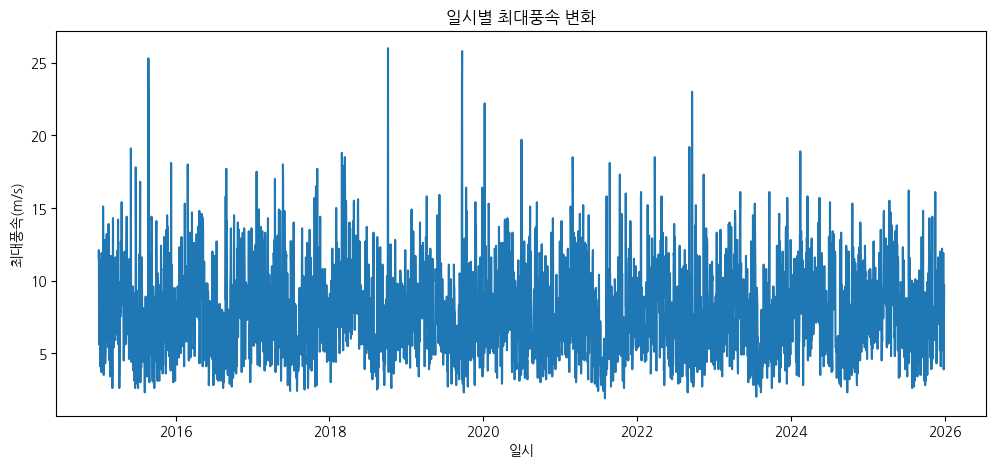

In [ ]:
# 일시 컬럼을 datetime 형식으로 변환
df_wind["일시"] = pd.to_datetime(df_wind["일시"])

# 일시 기준 정렬
df_wind = df_wind.sort_values("일시")

# 시본을 이용한 선 그래프
plt.figure(figsize=(12, 5))
sns.lineplot(
    data=df_wind,
    x="일시",
    y="최대풍속(m/s)"
)

plt.title("일시별 최대풍속 변화")
plt.xlabel("일시")
plt.ylabel("최대풍속(m/s)")
plt.show()


평균풍속이 가장 큰 달: 4
최대순간풍속이 가장 큰 달: 4


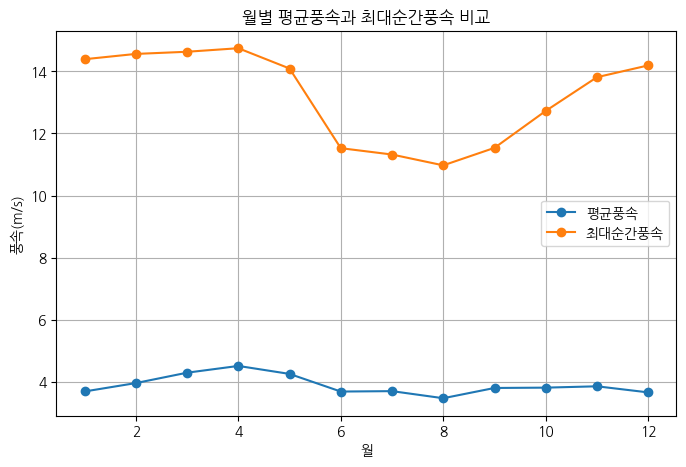

In [ ]:
# 평균풍속과 최대순간풍속이 가장 큰 달이 동일한가 전체 코드
import koreanize_matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# 1. 데이터 불러오기
df_wind = pd.read_csv(
    'https://raw.githubusercontent.com/jobsiggang/2026_AI_Datascience/refs/heads/main/ulleongdo_wind.csv',
    encoding='CP949',
    index_col=0
)

# 2. 데이터 전처리
# (1) 일시 열을 datetime 형식으로 변환
df_wind['일시'] = pd.to_datetime(df_wind['일시'])

# (2) 월(month) 정보 추출
df_wind['월'] = df_wind['일시'].dt.month

# 3. 결측치 처리
# 평균풍속(m/s) 결측치 → 평균값
df_wind['평균풍속(m/s)'] = df_wind['평균풍속(m/s)'].fillna(
    df_wind['평균풍속(m/s)'].mean()
)

# 최대순간풍속(m/s) 결측치 → 0
df_wind['최대순간풍속(m/s)'] = df_wind['최대순간풍속(m/s)'].fillna(0)

# 4. 월별 데이터 집계
df_month = df_wind.groupby('월').agg({
    '평균풍속(m/s)': 'mean',
    '최대순간풍속(m/s)': 'mean'
})

# 5. 최대값을 갖는 월 확인
max_avg_wind_month = df_month['평균풍속(m/s)'].idxmax()
max_gust_month = df_month['최대순간풍속(m/s)'].idxmax()

print("평균풍속이 가장 큰 달:", max_avg_wind_month)
print("최대순간풍속이 가장 큰 달:", max_gust_month)

# 6. 시각화
plt.figure(figsize=(8, 5))
plt.plot(df_month.index, df_month['평균풍속(m/s)'], marker='o', label='평균풍속')
plt.plot(df_month.index, df_month['최대순간풍속(m/s)'], marker='o', label='최대순간풍속')
plt.xlabel('월')
plt.ylabel('풍속(m/s)')
plt.title('월별 평균풍속과 최대순간풍속 비교')
plt.legend()
plt.grid(True)
plt.show()
